# 1. Import and Install Dependencies

In [ ]:
!pip install tensorflow==2.9.1 tensorflow-gpu==2.9.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import imutils
import joblib
import pickle

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [ ]:
def frame_read(file):
    cap = cv2.VideoCapture(file)
    # Set mediapipe model 
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():
    
           # Read feed
            ret, frame = cap.read()
    
            if ret==True:
                frame = imutils.resize(frame, width=600)
                # Make detections
                image, results = mediapipe_detection(frame, holistic)
        #         print(results)q
                
                # Draw landmarks
                draw_styled_landmarks(image, results)
        
                # Show to screen
                cv2.imshow('OpenCV Feed', image)
        
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
            else:
                cap.release()
                cv2.destroyAllWindows()
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
for file in os.listdir("sample/dry"):
    print(file)
    if file.endswith(".MOV"):
        path=os.path.join("sample/dry",file)
        frame_read(path)

In [ ]:
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture('0.MOV')
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()
        
        if ret==True:
            frame = imutils.resize(frame, width=600)
            # Make detections
            image, results = mediapipe_detection(frame, holistic)
    #         print(results)q
            
            # Draw landmarks
            draw_styled_landmarks(image, results)
    
            # Show to screen
            cv2.imshow('OpenCV Feed', image)
    
            # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
        else:
            cap.release()
            cv2.destroyAllWindows()

In [ ]:
len(results.left_hand_landmarks.landmark)

In [ ]:
results

In [ ]:
draw_landmarks(frame, results)

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [ ]:
len(results.right_hand_landmarks.landmark)

In [ ]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [ ]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [ ]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [6]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [ ]:
result_test = extract_keypoints(results)

In [ ]:
result_test[:10]

In [ ]:
468*3+33*4+21*3+21*3

In [ ]:
np.save('0', result_test)

In [ ]:
np.load('0.npy')

In [ ]:
print(len(result_test))

# 4. Setup Folders for Collection

In [7]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Test_Data') 

# Actions that we try to detect
actions = np.array(['dry','healthy'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 60 frames in length
sequence_length = 60

In [8]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [ ]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [ ]:
def frame_read(file,seq,action):
    # Set mediapipe model 
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        cap = cv2.VideoCapture(file)
        # NEW LOOP
        # Loop through actions
        if seq<no_sequences: 
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()
                if ret==True:
                    # Make detections
                    image, results = mediapipe_detection(frame, holistic)
    #                    print(results)
    
                    # Draw landmarks
                    draw_styled_landmarks(image, results)
                
                    # NEW Apply wait logic
                    if frame_num == 0: 
                        cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, seq), (15,12), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        # Show to screen
                        cv2.imshow('OpenCV Feed', image)
                        cv2.waitKey(1000)
                    else: 
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, seq), (15,12), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        # Show to screen
                        cv2.imshow('OpenCV Feed', image)
                    
                    # NEW Export keypoints
                    keypoints = extract_keypoints(results)
                    npy_path = os.path.join(DATA_PATH, action, str(seq), str(frame_num))
                    np.save(npy_path, keypoints)
                    # Break gracefully
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break
                if frame_num==60:
                    break;
            print(seq)
        cap.release()
        cv2.destroyAllWindows()

In [ ]:
for action in actions:
    dir_path="sample/{}".format(action)
    seq=0
    for file in os.listdir(dir_path):
        print(file)
        if file.endswith(".MOV"):
            path=os.path.join(dir_path,file)
            frame_read(path,seq,action)
            seq=seq+1

In [ ]:
cv2.destroyAllWindows()

In [ ]:
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            cap = cv2.VideoCapture('0.MOV')
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()
                if ret==True:
                    # Make detections
                    image, results = mediapipe_detection(frame, holistic)
#                     print(results)
    
                    # Draw landmarks
                    draw_styled_landmarks(image, results)
                
                    # NEW Apply wait logic
                    if frame_num == 0: 
                        cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        # Show to screen
                        cv2.imshow('OpenCV Feed', image)
                        cv2.waitKey(1000)
                    else: 
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        # Show to screen
                        cv2.imshow('OpenCV Feed', image)
                    
                    # NEW Export keypoints
                    keypoints = extract_keypoints(results)
                    npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                    np.save(npy_path, keypoints)
                    # Break gracefully
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break
                if frame_num==60:
                    cap.release()
                    cv2.destroyAllWindows()
                    break;
        cap.release()
        cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [9]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [10]:
label_map = {label:num for num, label in enumerate(actions)}

In [11]:
label_map

{'dry': 0, 'healthy': 1}

In [12]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length-10):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [13]:
np.array(sequences)

array([[[ 5.09093106e-01,  1.65133834e-01, -6.47407353e-01, ...,
          4.05558705e-01,  9.08884585e-01,  6.84193161e-04],
        [ 5.09112060e-01,  1.65633574e-01, -6.03945315e-01, ...,
          4.03919876e-01,  9.09582555e-01,  1.92343257e-03],
        [ 5.09084523e-01,  1.66298315e-01, -6.16634488e-01, ...,
          4.04715359e-01,  9.07815635e-01,  1.07293902e-03],
        ...,
        [ 5.12077749e-01,  1.71289310e-01, -3.27443779e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 5.12094617e-01,  1.71198025e-01, -4.63642418e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 5.12334049e-01,  1.71102121e-01, -5.20838261e-01, ...,
          4.03509408e-01,  8.84871781e-01, -9.36258584e-04]],

       [[ 5.06798983e-01,  1.75842345e-01, -6.70145333e-01, ...,
          4.08481598e-01,  9.06611264e-01,  4.18719603e-03],
        [ 5.06742179e-01,  1.75581411e-01, -6.30222678e-01, ...,
          4.09413785e-01,  9.09274936e

In [14]:
np.array(labels).shape

(60,)

In [15]:
X = np.array(sequences)

In [16]:
X.shape

(60, 50, 1662)

In [17]:
y = to_categorical(labels).astype(int)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [19]:
y_test.shape

(3, 2)

# 7. Build and Train LSTM Neural Network

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [21]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [22]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(50,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [23]:
res = [.7, 0.2, 0.1]

In [24]:
actions[np.argmax(res)]

'dry'

In [25]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [26]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
2/2 [==============================] - 8s 416ms/step - loss: 1.5526 - categorical_accuracy: 0.4386
Epoch 2/2000
2/2 [==============================] - 1s 367ms/step - loss: 0.7166 - categorical_accuracy: 0.5263
Epoch 3/2000
2/2 [==============================] - 1s 365ms/step - loss: 3.6275 - categorical_accuracy: 0.4561
Epoch 4/2000
2/2 [==============================] - 1s 396ms/step - loss: 375.6516 - categorical_accuracy: 0.4737
Epoch 5/2000
2/2 [==============================] - 1s 424ms/step - loss: 27.0265 - categorical_accuracy: 0.4912
Epoch 6/2000
2/2 [==============================] - 1s 347ms/step - loss: 15.6510 - categorical_accuracy: 0.5263
Epoch 7/2000
2/2 [==============================] - 1s 393ms/step - loss: 15.0059 - categorical_accuracy: 0.5263
Epoch 8/2000
2/2 [==============================] - 1s 443ms/step - loss: 8.3108 - categorical_accuracy: 0.5088
Epoch 9/2000
2/2 [==============================] - 1s 418ms/step - loss: 14.2260 - categorical_acc

2/2 [==============================] - 1s 346ms/step - loss: 5194.5732 - categorical_accuracy: 0.5614
Epoch 143/2000
2/2 [==============================] - 1s 350ms/step - loss: 5145.3105 - categorical_accuracy: 0.4386
Epoch 144/2000
2/2 [==============================] - 1s 270ms/step - loss: 4626.8784 - categorical_accuracy: 0.5439
Epoch 145/2000
2/2 [==============================] - 1s 405ms/step - loss: 2174.3110 - categorical_accuracy: 0.3860
Epoch 146/2000
2/2 [==============================] - 1s 402ms/step - loss: 8996.3496 - categorical_accuracy: 0.5439
Epoch 147/2000
2/2 [==============================] - 1s 337ms/step - loss: 4655.0918 - categorical_accuracy: 0.4737
Epoch 148/2000
2/2 [==============================] - 1s 425ms/step - loss: 2932.9402 - categorical_accuracy: 0.5439
Epoch 149/2000
2/2 [==============================] - 1s 396ms/step - loss: 11190.1191 - categorical_accuracy: 0.3860
Epoch 150/2000
2/2 [==============================] - 1s 401ms/step - loss: 14

2/2 [==============================] - 1s 269ms/step - loss: 1667.7993 - categorical_accuracy: 0.5088
Epoch 282/2000
2/2 [==============================] - 1s 503ms/step - loss: 2064.7795 - categorical_accuracy: 0.4561
Epoch 283/2000
2/2 [==============================] - 1s 493ms/step - loss: 2467.8513 - categorical_accuracy: 0.5263
Epoch 284/2000
2/2 [==============================] - 1s 359ms/step - loss: 3643.0991 - categorical_accuracy: 0.5088
Epoch 285/2000
2/2 [==============================] - 1s 466ms/step - loss: 3662.5850 - categorical_accuracy: 0.5263
Epoch 286/2000
2/2 [==============================] - 1s 398ms/step - loss: 3929.1650 - categorical_accuracy: 0.4912
Epoch 287/2000
2/2 [==============================] - 1s 413ms/step - loss: 2340.6021 - categorical_accuracy: 0.5263
Epoch 288/2000
2/2 [==============================] - 1s 344ms/step - loss: 4461.9727 - categorical_accuracy: 0.4386
Epoch 289/2000
2/2 [==============================] - 1s 362ms/step - loss: 435

2/2 [==============================] - 1s 334ms/step - loss: 7102.1387 - categorical_accuracy: 0.4561
Epoch 352/2000
2/2 [==============================] - 1s 295ms/step - loss: 15529.5811 - categorical_accuracy: 0.5263
Epoch 353/2000
2/2 [==============================] - 1s 306ms/step - loss: 10321.9707 - categorical_accuracy: 0.5263
Epoch 354/2000
2/2 [==============================] - 1s 322ms/step - loss: 8477.0908 - categorical_accuracy: 0.4737
Epoch 355/2000
2/2 [==============================] - 1s 318ms/step - loss: 7025.4863 - categorical_accuracy: 0.4737
Epoch 356/2000
2/2 [==============================] - 1s 277ms/step - loss: 9034.9209 - categorical_accuracy: 0.5263
Epoch 357/2000
2/2 [==============================] - 1s 322ms/step - loss: 10853.2783 - categorical_accuracy: 0.5263
Epoch 358/2000
2/2 [==============================] - 1s 334ms/step - loss: 3481.9795 - categorical_accuracy: 0.6491
Epoch 359/2000
2/2 [==============================] - 1s 330ms/step - loss: 

2/2 [==============================] - 1s 267ms/step - loss: 2553.8630 - categorical_accuracy: 0.5088
Epoch 422/2000
2/2 [==============================] - 1s 295ms/step - loss: 2567.4211 - categorical_accuracy: 0.4211
Epoch 423/2000
2/2 [==============================] - 1s 314ms/step - loss: 2899.7012 - categorical_accuracy: 0.5263
Epoch 424/2000
2/2 [==============================] - 1s 314ms/step - loss: 1820.4556 - categorical_accuracy: 0.4737
Epoch 425/2000
2/2 [==============================] - 1s 305ms/step - loss: 3421.2104 - categorical_accuracy: 0.5263
Epoch 426/2000
2/2 [==============================] - 1s 280ms/step - loss: 1087.4901 - categorical_accuracy: 0.4561
Epoch 427/2000
2/2 [==============================] - 1s 305ms/step - loss: 678.9647 - categorical_accuracy: 0.5263
Epoch 428/2000
2/2 [==============================] - 1s 278ms/step - loss: 579.6650 - categorical_accuracy: 0.4912
Epoch 429/2000
2/2 [==============================] - 1s 278ms/step - loss: 792.7

KeyboardInterrupt: 

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 50, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 596,642
Trainable params: 596,642
Non-trai

# 8. Make Predictions

In [27]:
res = model.predict(X_test)

1/1 [==============================] - 1s 563ms/step


In [36]:
actions[np.argmax(res[0])]

'healthy'

In [37]:
actions[np.argmax(y_test[0])]

'healthy'

# 9. Save Weights

In [30]:
model.save('action1.h5')

In [ ]:
model.load_weights('action1.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [31]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [32]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 83ms/step


In [33]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [34]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[0, 0],
        [0, 3]]], dtype=int64)

In [35]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [40]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

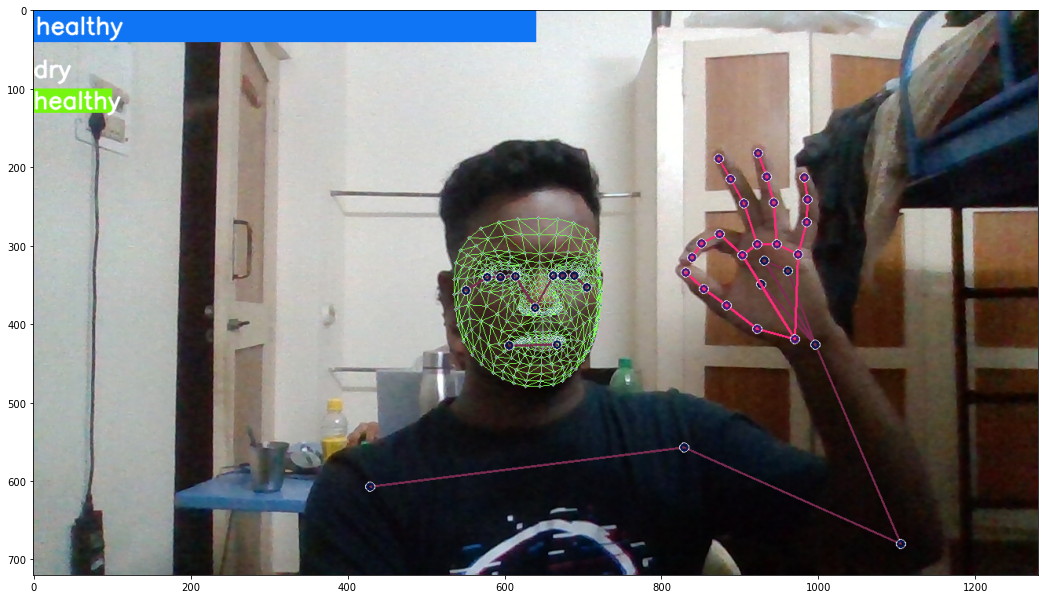

In [44]:
plt.figure(figsize=(18,18))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(prob_viz(res, actions, image, colors))

In [ ]:
sequence.reverse()

In [ ]:
len(sequence)

In [ ]:
sequence.append('def')

In [ ]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [42]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 2000);
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1000);
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

healthy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
healthy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
healthy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
healthy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
healthy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
healthy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
healthy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
healthy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
healthy
<class 'mediapipe.python.solution_base.SolutionOutputs'>

In [41]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
res[np.argmax(res)] > threshold

In [ ]:
(num_sequences,30,1662)

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))